### scikit-learn中的多项式和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [3]:
# 改造X，针对现有的X，做一定的变形
from sklearn.preprocessing import PolynomialFeatures # 多项式特征

In [4]:
poly = PolynomialFeatures(degree=2) # 初始化对象，这里有一个超参数，表示封装到最大2次
poly.fit(X)
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [7]:
X2[:5, :] # 相当于加入了X^0

array([[ 1.        , -1.25732833,  1.58087453],
       [ 1.        ,  2.29019041,  5.24497211],
       [ 1.        , -0.7946266 ,  0.63143143],
       [ 1.        , -2.63845711,  6.96145593],
       [ 1.        ,  2.25526237,  5.08620837]])

In [8]:
X[:5, :]

array([[-1.25732833],
       [ 2.29019041],
       [-0.7946266 ],
       [-2.63845711],
       [ 2.25526237]])

In [12]:
# X**2[:5, :]
(x**2).reshape(-1, 1)[:5, :] # x是int类型

array([[1.58087453],
       [5.24497211],
       [0.63143143],
       [6.96145593],
       [5.08620837]])

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y) # 得到多项式的各项的系数
y_predict2 = lin_reg2.predict(X2)

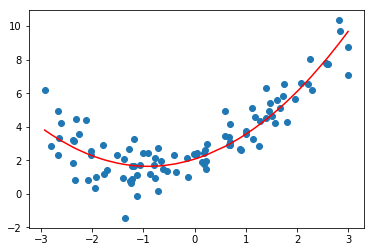

In [14]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [15]:
lin_reg2.coef_ # 拟合结果

array([0.        , 0.95530889, 0.52828507])

In [16]:
lin_reg2.intercept_

2.075910114208006

### 关于PolynomialFeatures

In [17]:
X = np.arange(1, 11) # 左闭右开

In [18]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [19]:
X = np.arange(1, 11).reshape(-1, 2)

In [20]:
X.shape

(5, 2)

In [21]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [24]:
poly = PolynomialFeatures(degree=2)
poly.fit(X) # 相当于对X进行操作嘛
X2 = poly.transform(X)

In [25]:
X2.shape

(5, 6)

In [29]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [28]:
print(X2)

[[  1.   1.   2.   1.   2.   4.]
 [  1.   3.   4.   9.  12.  16.]
 [  1.   5.   6.  25.  30.  36.]
 [  1.   7.   8.  49.  56.  64.]
 [  1.   9.  10.  81.  90. 100.]]


### Pipeline管道

1. 生成多项式特征
2. 如果degree=100，则特征之间的分布就会很不均衡，导致搜索过慢，所以要归一化一下
3. 线性回归

In [30]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [34]:
# 元组：词典
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [35]:
poly_reg.fit(X, y) # 相当于一个多项式回归的类
y_predict = poly_reg.predict(X)

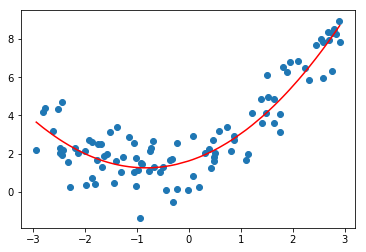

In [38]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()